# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [243]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [396]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

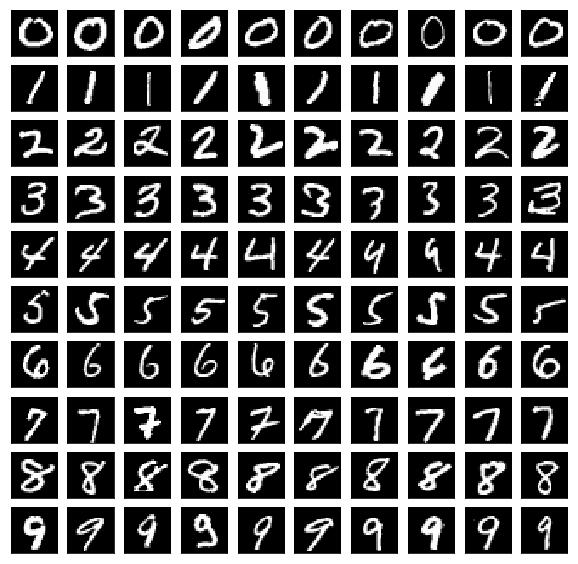

In [245]:
def P1(num_examples=10):
    ### STUDENT START ###

    #Init
    num_digits = 10

    #Initialize dictionary with empty list for each digit.
    label_indices = {}
    for digit in range(num_digits):
        label_indices[digit] = []

    #For each digit (0-9), get indices of labels that match that digit.
    for i in range (Y.shape[0]):
        digit = Y[i]
        label_indices[digit].append(i)

    #Display 10 examples for each digit.
    f, axarr = plt.subplots(num_digits, num_examples, figsize=(10, 10))
    for digit in range(num_digits):
        for i in range(num_examples):
            index = label_indices[digit][i]
            pixels = X[index] * 255.0
            pixels = np.array(pixels, dtype='uint8')
            pixels = pixels.reshape((28, 28))
            axarr[digit, i].imshow(pixels, cmap='gray')
            axarr[digit, i].axes.get_xaxis().set_visible(False)
            axarr[digit, i].axes.get_yaxis().set_visible(False)
    plt.show()

    ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def P2(k_values):

    ### STUDENT START ###

    for k in k_values:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(mini_train_data, mini_train_labels)
        dev_preds = clf.predict(dev_data)

        correct, total = 0, 0
        for pred, label in zip(dev_preds, dev_labels):
            if pred == label: correct += 1
            total += 1
        print ('k: %0d  total: %3d  correct: %3d  accuracy: %3.2f' %(k, total, correct, 1.0*correct/total))
    
    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)


k: 1  total: 1000  correct: 888  accuracy: 0.89
k: 3  total: 1000  correct: 878  accuracy: 0.88
k: 5  total: 1000  correct: 869  accuracy: 0.87
k: 7  total: 1000  correct: 865  accuracy: 0.86
k: 9  total: 1000  correct: 863  accuracy: 0.86


In [6]:
###For k=1, show precision, recall, and F1 for each label.
k = 1
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(mini_train_data, mini_train_labels)
dev_preds = clf.predict(dev_data)
print(classification_report(dev_labels, dev_preds))


             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER: Using the dev data and KNN model with (k=1), it appears the most difficult digit to predict is (9), which has the lowest f1-score of (0.80).

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [7]:
def P3(train_sizes, accuracies):

    ### STUDENT START ###
    
    #Init
    k = 1
    
    #Main
    for train_size in train_sizes:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(train_data[:train_size], train_labels[:train_size])
        
        #Make predictions
        start_time = time.time()
        dev_preds = clf.predict(dev_data)
        elapsed_time = time.time() - start_time
        print(elapsed_time)

        #Calculate accuracy
        correct, total = 0, 0
        for pred, label in zip(dev_preds, dev_labels):
            if pred == label: correct += 1
            total += 1
        accuracy = 1.0*correct/total
        accuracies.append(accuracy)
        print ('train-size: %5d  total: %4d  correct: %4d  accuracy: %3.2f  predict-time: %4.3f' %(train_size, total, correct, accuracy, elapsed_time))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

0.142999887466
train-size:   100  total: 1000  correct:  720  accuracy: 0.72  predict-time: 0.143
0.31200003624
train-size:   200  total: 1000  correct:  786  accuracy: 0.79  predict-time: 0.312
0.573999881744
train-size:   400  total: 1000  correct:  841  accuracy: 0.84  predict-time: 0.574
1.30900001526
train-size:   800  total: 1000  correct:  884  accuracy: 0.88  predict-time: 1.309
2.5759999752
train-size:  1600  total: 1000  correct:  902  accuracy: 0.90  predict-time: 2.576
8.79699993134
train-size:  3200  total: 1000  correct:  926  accuracy: 0.93  predict-time: 8.797
16.371999979
train-size:  6400  total: 1000  correct:  937  accuracy: 0.94  predict-time: 16.372
22.8029999733
train-size: 12800  total: 1000  correct:  959  accuracy: 0.96  predict-time: 22.803
40.3630001545
train-size: 25000  total: 1000  correct:  970  accuracy: 0.97  predict-time: 40.363


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

For n=60000, accuracy prediction is (1.243)
AFTER transformation to linear regression model: for n=60000, accuracy prediction is (0.987)


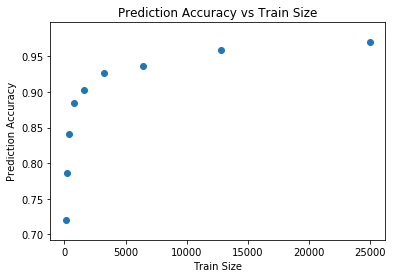

In [36]:
#def P4():

### STUDENT START ###

#Plot Prediction Accuracy vs Train Size
plt.scatter(train_sizes, accuracies)
plt.xlabel("Train Size")
plt.ylabel("Prediction Accuracy")
plt.title("Prediction Accuracy vs Train Size")

#Create linear regression object
regr = LinearRegression()

#Convert train_sizes from vector to matrix
train_sizes_matrix = []
for size in train_sizes:
    train_sizes_matrix.append([size])

#Fit linear regression model
regr.fit(train_sizes_matrix, accuracies)

#Make accuracy prediction for n=60000
n = 60000
test_matrix = [[n]]
test_pred = regr.predict(test_matrix)

#Observe that accuracy prediction (1.243) is larger than 1, which is impossible.
print ('For n=%i, accuracy prediction is (%1.3f)' %(n, test_pred))

###Apply transformation

#Fit linear regression model
regr.fit(train_sizes_matrix, 1/np.log(accuracies))

#Make accuracy prediction for n=60000
n = 60000
test_matrix = [[n]]
test_pred = regr.predict(test_matrix)
test_pred = np.exp(1/test_pred)
print ('AFTER transformation to linear regression model: for n=%i, accuracy prediction is (%1.3f)' %(n, test_pred))

### STUDENT END ###

#P4()

ANSWER: The linear regression model without any transformations predicts an accuracy of 1.243 for (n=60000), which is impossible since maximum accuracy is 1 (i.e., 100%).  After applying the transformation "1/np.log(accuracies)", the linear regression model predicts an accuracy of 0.987 for (n=60000), which seems reasonable given the accuracy for (n-25000) is (0.97).

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix:
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Most confused pair is (4, 9) with confusion count of (23).


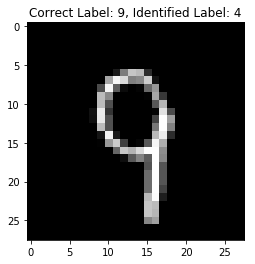

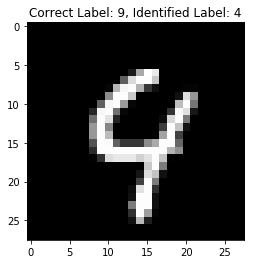

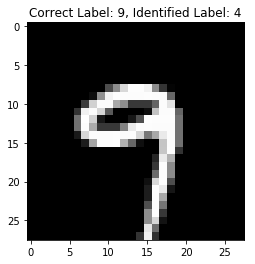

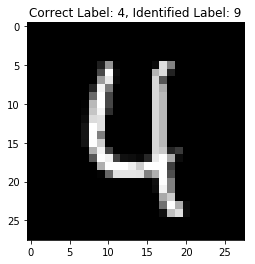

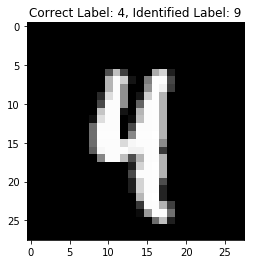

In [246]:
def P5():

    ### STUDENT START ###

    #Train 1-NN model
    k = 1
    clf = KNeighborsClassifier(n_neighbors=k)    
    clf.fit(mini_train_data, mini_train_labels)

    #Make predictions for dev data
    dev_predictions = clf.predict(dev_data)
    
    #Create confusion matrix
    cm = confusion_matrix(dev_labels, dev_predictions, labels=np.arange(10))
    print("Confusion Matrix:")
    print(cm)
    
    #Find most confused pair of digits
    most_confused_pair_list = []
    most_confused_count = 0
    for i in range(0, 9):
        for j in range(i+1, 10):
            cm_val = cm[i][j] + cm[j][i]
            if (cm_val == most_confused_count):
                most_confused_pair_list.append((i, j))
            elif (cm_val > most_confused_count):
                most_confused_pair_list = [(i, j)]
                most_confused_count = cm_val

    #Show results
    num_examples = 5
    for pair in most_confused_pair_list:
        print('Most confused pair is (%i, %i) with confusion count of (%i).' %(pair[0], pair[1], most_confused_count))
        
        #Display up to 5 examples of the most confused pair
        count = 0
        for index in range(0, len(dev_labels)):
            dev = dev_labels[index]
            prediction = dev_predictions[index]
            if (prediction != dev and prediction in pair and dev in pair and count < num_examples):
                pixels = dev_data[index] * 255.0
                pixels = np.array(pixels, dtype='uint8')
                pixels = pixels.reshape((28, 28))
                plt.imshow(pixels, cmap='gray')
                plt.title("Correct Label: " + str(int(dev)) + ", Identified Label: " + str(int(prediction)))
                plt.show()
                count += 1
    
    ### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [232]:
#Get Gaussian weights for distance (0, 1, 2).
def getGaussianWeights(sigma=1):
    output = []
    for i in range(3):
        GaussianWeight = 1/((2*np.pi)*sigma**2)*np.exp(-0.5*(i/sigma**2))
        output.append(GaussianWeight)
    return output


#Apply Gaussian blurring to image.
#Assumption: Input pixels is a 2-D numpy array.
def blurImage(input, weights):
    input = input * 255.0
    input = input.reshape((28, 28))
    output = np.copy(input)
    numRows = output.shape[0]
    numCols = output.shape[1]
        
    #Blur each pixel of the input image.
    for row in range(0, numRows):
        for col in range(0, numCols):
            #Blur pixel using neighbor values
            sum_val = 0
            sum_weights = 0
            for row_offset in range(-1,2):
                for col_offset in range(-1,2):
                    row1 = row + row_offset
                    col1 = col + col_offset
                    if row1 < 0 or row1 >= numRows or col1 < 0 or col1 >= numCols: continue
                    weight = weights[abs(row_offset)+abs(col_offset)]
                    sum_weights += weight
                    sum_val += input[row1][col1] * weight
            output[row][col] = int(sum_val/sum_weights)
    output = output.reshape((28*28))
    output /= 255.0
    return output


#Blur all images of training or dev data.
def blurData(in_data):
    out_data = np.zeros(in_data.shape)
    
    #Get weights for blurring
    weights = getGaussianWeights()
    
    #Apply blurring
    for i in range(in_data.shape[0]):
        in_pixels = np.copy(in_data[i])
        out_data[i] = blurImage(in_pixels, weights)
    return out_data


In [235]:
#Train 1-NN model
k = 1
clf = KNeighborsClassifier(n_neighbors=k)    
clf.fit(mini_train_data, mini_train_labels)
accuracy = clf.score(dev_data, dev_labels)
print('1-NN Accuracy on Dev Data: %1.3f' %(accuracy))

1-NN Accuracy on Dev Data: 0.888


In [237]:
#Create blur train/dev data
blur_train_data = blurData(mini_train_data)
blur_dev_data = blurData(dev_data)

In [240]:
#Preprocess the training data but not the dev data
clf1 = KNeighborsClassifier(n_neighbors=k)    
clf1.fit(blur_train_data, mini_train_labels)
accuracy1 = clf1.score(dev_data, dev_labels)
print('1-NN Accuracy on Dev Data: %1.3f' %(accuracy1))

1-NN Accuracy on Dev Data: 0.906


In [241]:
#Preprocess the dev data but not the training data
clf2 = KNeighborsClassifier(n_neighbors=k)    
clf2.fit(mini_train_data, mini_train_labels)
accuracy2 = clf2.score(blur_dev_data, dev_labels)
print('1-NN Accuracy on Dev Data: %1.3f' %(accuracy2))

1-NN Accuracy on Dev Data: 0.875


In [242]:
#Preprocess both training and dev data
clf3 = KNeighborsClassifier(n_neighbors=k)    
clf3.fit(blur_train_data, mini_train_labels)
accuracy3 = clf3.score(blur_dev_data, dev_labels)
print('1-NN Accuracy on Dev Data: %1.3f' %(accuracy3))

1-NN Accuracy on Dev Data: 0.900


ANSWER:  Without blurring, the original 1-NN classifier has a prediction accuracy of 0.888 for the dev data.  Blurring the training data but not the dev data improves the prediction accuracy to 0.906, and this accuracy improvement is expected since blurring the training data reduces the inconsistences between different samples of the same digit.  Blurring the dev data but not the training data degrades the prediction accuracy to 0.875, which is undesirable since blurred dev data contains less resolution (i.e., information) to match to the training data.  Lastly, blurring both training and dev data gives a prediction accuracy of 0.900, which is expected since blurring both training and dev data will at least make them consistent and comparable to not blurring data sets.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [247]:
#Map pixel values to 0, 1, or 2.
def categorize_pixel(data):
    categorized_data = np.zeros(data.shape)
    array_ones = np.ones(data.shape)
    categorized_data = categorized_data + (data > 0.33) * array_ones + (data > 0.66) * array_ones
    return categorized_data


def P7():

    ### STUDENT START ###
    
    #Train model (BernoulliNB)
    alpha = 0.1
    nb = BernoulliNB(alpha=alpha, binarize=0.5)
    nb.fit(mini_train_data, mini_train_labels)
    
    #Make predictions
    preds = nb.predict(dev_data)
    
    #Check accuracy of predictions
    correct, total = 0, 0
    for pred, label in zip(preds, dev_labels):
        if pred == label: correct += 1
        total += 1
    print ('With alpha = %.2f' %alpha)
    print ('BernoulliNB:  total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

    #####
    
    #Categorize train and dev data into 0, 1, 2
    categorized_train_data = categorize_pixel(mini_train_data)
    categorized_dev_data = categorize_pixel(dev_data)
    
    #Train model (MultinomialNB)
    alpha = 0.1
    nb = MultinomialNB(alpha=alpha)
    nb.fit(mini_train_data, mini_train_labels)
    
    #Make predictions
    preds = nb.predict(dev_data)
    
    #Check accuracy of predictions
    correct, total = 0, 0
    for pred, label in zip(preds, dev_labels):
        if pred == label: correct += 1
        total += 1
    print ('With alpha = %.2f' %alpha)
    print ('MultinomialNB:  total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

    
    ### STUDENT END ###

P7()

With alpha = 0.10
BernoulliNB:  total: 1000  correct: 819  accuracy: 0.82
With alpha = 0.10
MultinomialNB:  total: 1000  correct: 801  accuracy: 0.80


ANSWER: According to the results above, the multi-class NB model a lower prediction accuracy (0.80) compared to the BernoulliNB classifier's accuracy (0.82).  One possible explanation, for the lower prediction accuracy of the multi-class NB model, is that the 3rd classification type (grey) does not provide any additional insight for the classifier.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [258]:
def P8(alphas):

    ### STUDENT START ###
    
    nb = GridSearchCV(BernoulliNB(binarize=0.5), param_grid=alphas)
    nb.fit(mini_train_data, mini_train_labels)
    return nb

    ### STUDENT END ###
   
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

In [260]:
#Get best param (alpha) and score (prediction accuracy)
print("Best Param: " + str(nb.best_params_) + "  Best Score: " + str(nb.best_score_))

#Compare prediction accuracies for (alpha=0.01) and (alpha=0)
alpha = 0.01
bnb = BernoulliNB(alpha=alpha, binarize=0.5)
bnb.fit(mini_train_data, mini_train_labels)
accuracy = bnb.score(dev_data, dev_labels)
print ('With alpha = %.2f, dev-data prediction accuracy = %.3f' %(alpha, accuracy))

alpha = 0.00
bnb = BernoulliNB(alpha=alpha, binarize=0.5)
bnb.fit(mini_train_data, mini_train_labels)
accuracy = bnb.score(dev_data, dev_labels)
print ('With alpha = %.2f, dev-data prediction accuracy = %.3f' %(alpha, accuracy))


Best Param: {'alpha': 0.01}  Best Score: 0.821
With alpha = 0.01, dev-data prediction accuracy = 0.818
With alpha = 0.00, dev-data prediction accuracy = 0.801


ANSWER: The best prediction accuracy on the dev data is 0.818 and is attained by (alpha=0.01).  For (alpha=0), the prediction accuracy on the dev data is 0.801.  The need for an non-zero alpha is expected, in order to overcome overconfidence, due to the relatively small size of 1000 samples for mini_training_data.

(9) Try training a model using GaussianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [261]:
def P9():

    ### STUDENT START ###

    nb = GaussianNB()
    nb.fit(mini_train_data, mini_train_labels)
    return nb
    
    ### STUDENT END ###

gnb = P9()

#Get prediction accuracy for dev_data
accuracy = gnb.score(dev_data, dev_labels)
print('GaussianNB Accuracy on Dev Data: %1.3f' %(accuracy))


GaussianNB Accuracy on Dev Data: 0.621


THETA_


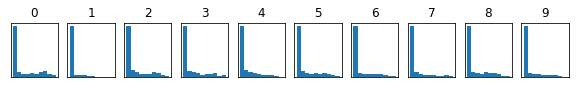

SIGMA_


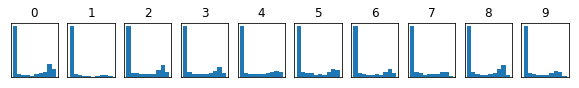

In [283]:
#Analyze theta and sigma
print("THETA_")
num_rows = 1
num_cols = 10
f, axarr = plt.subplots(num_rows, num_cols, figsize=(10, 1))
for i in range(10):
    axarr[i].hist(gnb.theta_[i])
    axarr[i].axes.get_xaxis().set_visible(False)
    axarr[i].axes.get_yaxis().set_visible(False)
    axarr[i].axes.set_title(i)
plt.show()

print("SIGMA_")
num_rows = 1
num_cols = 10
f, axarr = plt.subplots(num_rows, num_cols, figsize=(10, 1))
for i in range(10):
    axarr[i].hist(gnb.sigma_[i])
    axarr[i].axes.get_xaxis().set_visible(False)
    axarr[i].axes.get_yaxis().set_visible(False)
    axarr[i].axes.set_title(i)
plt.show()

In [305]:
#Improve accuracy by setting minimum sigma to a non-zero value..
def P9b(min_sigma):
    #Create Gaussian NB classifier
    nb = GaussianNB()
    nb.fit(mini_train_data, mini_train_labels)
    
    #Update small sigma's (e.g., 0) to min_sigma value
    with np.nditer(nb.sigma_, op_flags=['readwrite']) as it:
        for x in it:
            if x < min_sigma:
                x[...] = min_sigma

    return nb


#Find optimal min_sigma
for min_sigma in np.arange(0, 0.2, 0.01):
    gnb2 = P9b(min_sigma)
    
    #Get prediction accuracy for dev_data
    accuracy2 = gnb2.score(dev_data, dev_labels)
    print('For Min-Sigma: %1.2f, GaussianNB Accuracy on Dev Data: %1.3f' %(min_sigma, accuracy2))


For Min-Sigma: 0.00, GaussianNB Accuracy on Dev Data: 0.621
For Min-Sigma: 0.01, GaussianNB Accuracy on Dev Data: 0.799
For Min-Sigma: 0.02, GaussianNB Accuracy on Dev Data: 0.809
For Min-Sigma: 0.03, GaussianNB Accuracy on Dev Data: 0.813
For Min-Sigma: 0.04, GaussianNB Accuracy on Dev Data: 0.813
For Min-Sigma: 0.05, GaussianNB Accuracy on Dev Data: 0.814
For Min-Sigma: 0.06, GaussianNB Accuracy on Dev Data: 0.808
For Min-Sigma: 0.07, GaussianNB Accuracy on Dev Data: 0.806
For Min-Sigma: 0.08, GaussianNB Accuracy on Dev Data: 0.806
For Min-Sigma: 0.09, GaussianNB Accuracy on Dev Data: 0.807
For Min-Sigma: 0.10, GaussianNB Accuracy on Dev Data: 0.806
For Min-Sigma: 0.11, GaussianNB Accuracy on Dev Data: 0.812
For Min-Sigma: 0.12, GaussianNB Accuracy on Dev Data: 0.809
For Min-Sigma: 0.13, GaussianNB Accuracy on Dev Data: 0.806
For Min-Sigma: 0.14, GaussianNB Accuracy on Dev Data: 0.805
For Min-Sigma: 0.15, GaussianNB Accuracy on Dev Data: 0.803
For Min-Sigma: 0.16, GaussianNB Accuracy

In [306]:
#Apply optimal min_sigma
min_sigma = 0.05
gnb2 = P9b(min_sigma)
accuracy2 = gnb2.score(dev_data, dev_labels)
print('For Min-Sigma: %1.2f, GaussianNB Accuracy on Dev Data: %1.3f' %(min_sigma, accuracy2))

For Min-Sigma: 0.05, GaussianNB Accuracy on Dev Data: 0.814


ANSWER: On the dev data, the first GaussianNB classifier has an accuracy of 0.621, while the second GaussianNB classifier has an accuracy of 0.814, which is comparable to the accuracy of the Bernoulli NB classifier.  For the first GaussianNB classifier, I observed that the sigma values were nearly all 0, which can be explained by the fact that the majority of pixels are either 0 or 1 with few values in-between.  Since GaussianNB is best suited for continuous values, instead of discrete categories, I updated the GaussianNB parameter (sigma_) to have a minimum sigma value of (0.05).  I believe that setting the (sigma_) parameter with non-zero values will ensure that more pixels are utilized, rather than ignored, by the classifier.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

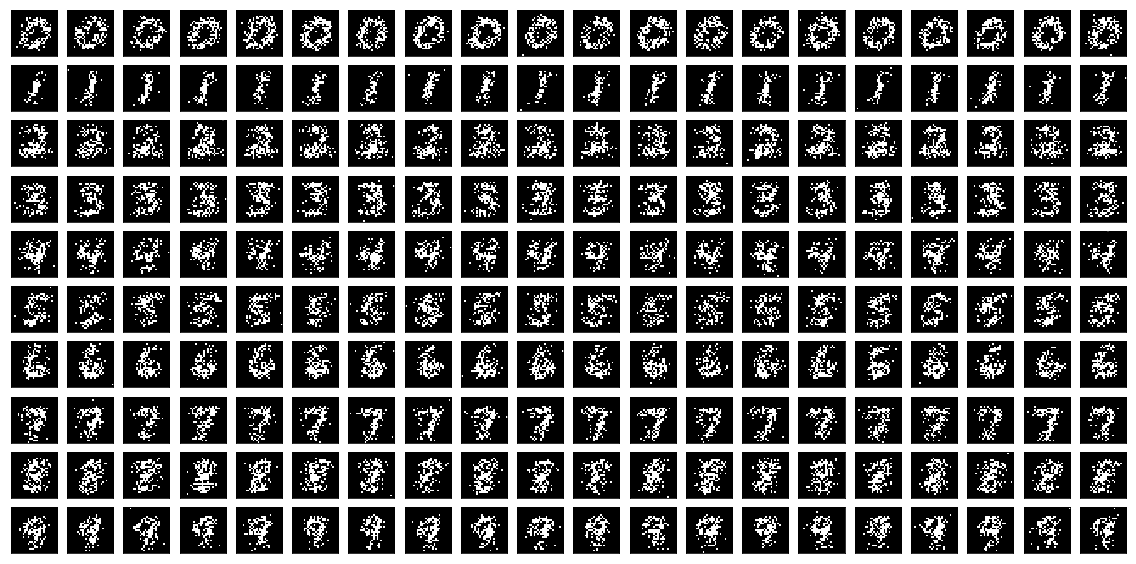

In [310]:
def P10(num_examples):

    ### STUDENT START ###

    #Init
    np.random.seed(0)
    
    #Train model (BernoulliNB)
    alpha = 0.1
    nb = BernoulliNB(alpha=alpha, binarize=0.5)
    nb.fit(mini_train_data, mini_train_labels)

    #Generate digits in 10x20 grid
    num_digits = 10
    n = 1  #Choose between 0 or 1
    f, axarr = plt.subplots(num_digits, num_examples, figsize=(20, 10))
    for digit in range(num_digits):
        p = np.exp(nb.feature_log_prob_[digit])
        for i in range(num_examples):
            pixels = np.random.binomial(n, p)
            pixels = pixels * 255.0
            pixels = np.array(pixels, dtype='uint8')
            pixels = pixels.reshape((28, 28))
            axarr[digit, i].imshow(pixels, cmap='gray')
            axarr[digit, i].axes.get_xaxis().set_visible(False)
            axarr[digit, i].axes.get_yaxis().set_visible(False)
    plt.show()
    
    ### STUDENT END ###

P10(20)

ANSWER: The generated digits, in general, do resemble the training digits.  Some generated digits (e.g., 0, 1, 3, 5, 7) are more discernable and bear greater resemblance to actual hand-written digits, while other generated digits (e.g., 2, 4, 6, 8, 9) are less discernable and have less resemblance to hand-written digits.  The digits, which are more consistent in shape for their samples found in the training data, will have pixels with higher estimated probabilities, which lead to more consistency and discernability in the generated digit results.

(11) Remember that a strongly calibrated classifier is roughly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [311]:
#Assumptions:
#(1) Input (val) is less than or equal to largest value in (buckets).
#(2) Input (buckets) is sorted in increasing order.
def getBucketIndex(buckets, val):
    for i in range(len(buckets)):
        bucket = buckets[i]
        if (val <= bucket):
            return i


def P11(buckets, correct, total):
    
    ### STUDENT START ###
    
    #Train model (BernoulliNB)
    alpha = 0.1
    nb = BernoulliNB(alpha=alpha, binarize=0.5)
    nb.fit(mini_train_data, mini_train_labels)
    
    #Get predictions and posterior probabitities
    preds = nb.predict(dev_data)
    probs = nb.predict_proba(dev_data)
    
    #Examine each prediction and posterior probabitity
    for i in range(len(preds)):
        bucket_index = getBucketIndex(buckets, np.amax(probs[i]))
        if (preds[i] == dev_labels[i]): correct[bucket_index] += 1
        total[bucket_index] += 1
    
    ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = float(correct[i]) / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  35    accuracy = 0.314
p(pred) <= 0.9990000000000    total =  95    accuracy = 0.442
p(pred) <= 0.9999900000000    total =  75    accuracy = 0.653
p(pred) <= 0.9999999000000    total =  63    accuracy = 0.714
p(pred) <= 0.9999999990000    total =  63    accuracy = 0.810
p(pred) <= 0.9999999999900    total =  92    accuracy = 0.804
p(pred) <= 0.9999999999999    total =  75    accuracy = 0.867
p(pred) <= 1.0000000000000    total = 502    accuracy = 0.960


ANSWER: The Naive Bayes model above is a medium-calibrated classifier since there is clearly positive correlation between posterior and accuracy.  However, the accuracy is less than 50% when posterior is between 90% to 99.9%; hence, the above cannot be deemed a strongly calibrated classifier.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [424]:
#Train GaussianNB model
def trainGaussianNB(train_data, train_labels, min_sigma=0.05):
    nb = GaussianNB()
    nb.fit(train_data, train_labels)

    #Update small sigma's (e.g., 0) to min_sigma value
    with np.nditer(nb.sigma_, op_flags=['readwrite']) as it:
        for x in it:
            if x < min_sigma:
                x[...] = min_sigma
    
    return nb

In [425]:
#Train BernoulliNB model
def trainBernoulliNB(train_data, train_labels, alpha=0.1, binarize=0.5):
    nb = BernoulliNB(alpha=alpha, binarize=binarize)
    nb.fit(train_data, train_labels)    
    return nb

In [421]:
#Train base-line model: original training and dev data
nb0 = trainBernoulliNB(mini_train_data, mini_train_labels)
score0 = nb0.score(dev_data, dev_labels)
print("Base-line model has prediction accuracy: %.5f" %(score0))

Base-line model has prediction accuracy: 0.83400


In [426]:
#Model #1: Add binarized quadrant pixel sums as new features

def addQuadrantPixelSumImage(input, threshold, quadrants = [(0, 0), (0, 1), (1, 0), (1, 1)]):
    output = np.copy(input)
    input = input.reshape((28, 28))
    numRows = input.shape[0]
    numCols = input.shape[1]
    total_sum = np.sum(input)
    
    #Calculate sum for each quadrant
    quadrant_sums = []
    for i, j in quadrants:
        row_start = i * (numRows/2)
        row_end = row_start + (numRows/2)
        col_start = j * (numCols/2)
        col_end = col_start + (numCols/2)

        quadrant_sum = 0
        for row in range(row_start, row_end):
            for col in range(col_start, col_end):
                quadrant_sum += input[row][col]
        
        #Append binarized quadrant sum to output
        append_val = 0
        if (total_sum != 0):
            append_val = int(quadrant_sum/total_sum > threshold)
        output = np.append(output, append_val)
        quadrant_sums.append(quadrant_sum)

    return output


#Add quadrant pixel sums as new features
def addQuadrantPixelSumData(in_data, threshold=0.4):
    quadrants = [(0, 0), (0, 1), (1, 0), (1, 1)]
    out_data = np.ndarray(shape=(in_data.shape[0], in_data.shape[1]+len(quadrants)), dtype=float)
    
    #Add pixel sum
    for i in range(in_data.shape[0]):
        in_pixels = np.copy(in_data[i])
        out_data[i] = addQuadrantPixelSumImage(in_pixels, threshold, quadrants)
    return out_data


#Add new feature: quadrant pixel sums
threshold = 0.12
mini_train_data1 = addQuadrantPixelSumData(mini_train_data, threshold)
dev_data1 = addQuadrantPixelSumData(dev_data, threshold)


#Train model #1
nb1 = trainBernoulliNB(mini_train_data1, mini_train_labels)
score = nb1.score(dev_data1, dev_labels)
print("Model #1 has prediction accuracy: %.5f" %(score))


Model #1 has prediction accuracy: 0.84000


In [411]:
#Find optimal threshold for Model #1
for threshold in np.arange(0.1, 0.16, 0.01):
    #Add new feature: binarized quadrant pixel sums
    mini_train_data2 = addQuadrantPixelSumData(mini_train_data, threshold)
    dev_data2 = addQuadrantPixelSumData(dev_data, threshold)

    #Train model #1
    nb2 = trainBernoulliNB(mini_train_data2, mini_train_labels)
    score = nb2.score(dev_data2, dev_labels)
    print("Threshold: %.3f  Model #1 has prediction accuracy: %.5f" %(threshold, score))

Threshold: 0.100  Model #1 has prediction accuracy: 0.83900
Threshold: 0.110  Model #1 has prediction accuracy: 0.83900
Threshold: 0.120  Model #1 has prediction accuracy: 0.84000
Threshold: 0.130  Model #1 has prediction accuracy: 0.84000
Threshold: 0.140  Model #1 has prediction accuracy: 0.84000
Threshold: 0.150  Model #1 has prediction accuracy: 0.83900


ANSWER: Adding the feature (binarized quadrant pixel sums) improves the prediction accuracy from 0.834 to 0.840.